In [1]:

import numpy as np
from matplotlib.pyplot import scatter
from matplotlib.pyplot import plot
%matplotlib notebook
from pylab import *
from pygam.datasets import wage
import pandas as pd 
from sklearn import metrics
from pygam import LinearGAM, s, l,f, penalties,LogisticGAM
import pickle

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<IPython.core.display.Javascript object>


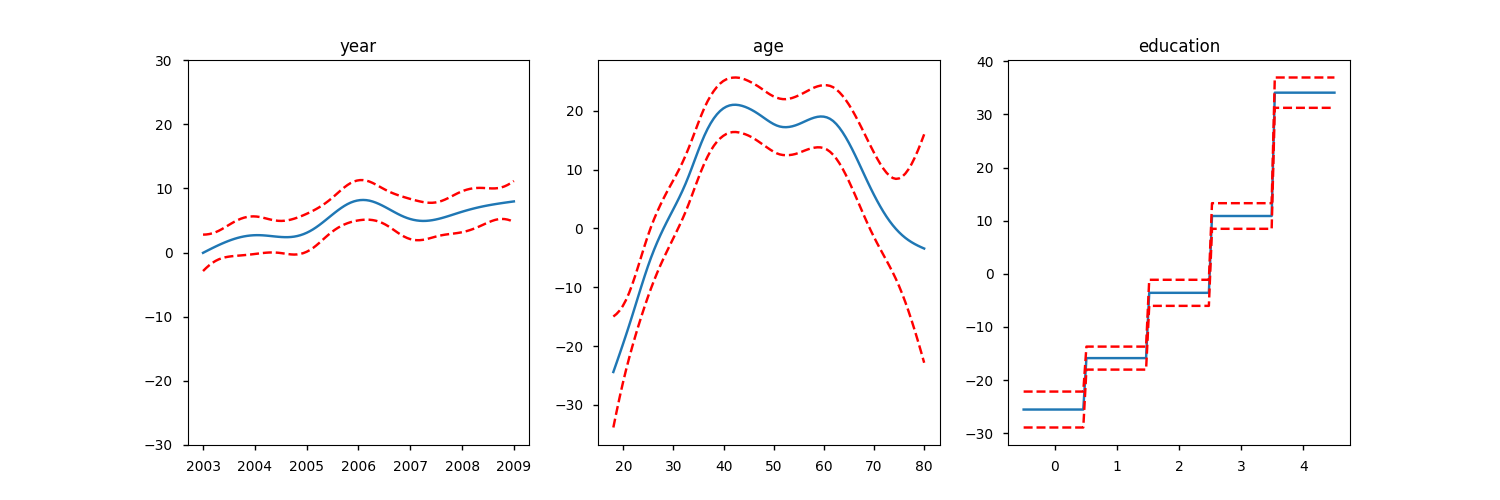

In [6]:

from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1,n_splines = 20) + f(2))
gam.gridsearch(X, y)


## plotting
fig, axs = plt.subplots(1,3, figsize = (15, 5));

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [7]:
from sklearn import datasets
from pygam import LinearGAM, s, f, penalties
from pygam.datasets import wage
rcParams['figure.figsize'] = (20,3)

# data pre-processing
x = pd.read_csv(r'/Users/twang78/Dropbox/Research/Projects/NeuralGam/datasets/cal_house_x_train.csv')
x.drop(['Unnamed: 0','longitude', 'latitude'],inplace = True, axis = 1)
titles = x.columns
test_x = pd.read_csv(r'/Users/twang78/Dropbox/Research/Projects/NeuralGam/datasets/cal_house_x_test.csv')
test_x.drop(['Unnamed: 0','longitude', 'latitude'],inplace = True, axis = 1)
x = x.values
test_x = test_x.values
y = pd.read_csv(r'/Users/twang78/Dropbox/Research/Projects/NeuralGam/datasets/cal_house_y_train.csv')
y = np.array(y['medianHouseValue'])
test_y = pd.read_csv(r'/Users/twang78/Dropbox/Research/Projects/NeuralGam/datasets/cal_house_y_test.csv')
test_y = np.array(test_y['medianHouseValue'])

## model
gam = LinearGAM(s(0) + s(1) + s(2)+s(3)+s(4)+s(5))
gam.gridsearch(x, y)
## plotting
plt.figure();
fig, axs = plt.subplots(1,6);

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    title(titles[i])
    ax.set_title(titles[i])

FileNotFoundError: [Errno 2] File /Users/twang78/Dropbox/Research/Projects/NeuralGam/datasets/cal_house_x_train.csv does not exist: '/Users/twang78/Dropbox/Research/Projects/NeuralGam/datasets/cal_house_x_train.csv'